In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

# Data wranggling
## Gattering Data

In [2]:
data_days=pd.read_csv("./day.csv")
data_hours=pd.read_csv("./hour.csv")

data_days.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
data_hours.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

In [4]:
#check the data in day,hours
data_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:

data_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#check duplicated value
print(f'sum of duplicated value at days are {data_days.duplicated().sum()}. Sum of duplicated value at hours are {data_hours.duplicated().sum()}')

sum of duplicated value at days are 0. Sum of duplicated value at hours are 0


In [7]:
data_days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
data_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Concolution from assessing
according to the data there's a problem 

1.Worng type Data at the dteday

## Cleaning Datasets

In [9]:
data_days.dteday=pd.to_datetime(data_days.dteday)

In [10]:
data_hours.dteday=pd.to_datetime(data_hours.dteday)

In [11]:
data_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis

according from the readme file i got both the data is same but differences only daily and hourly
so i decided to used  data daily 

## explanatory analysis

produces some question according to the dataset
1. how much rental by years
2.What the season are mostly use bicyle and vice versa
3.do next month increased use the bicycle ?
4.when do people rent the bicyle ?

In [12]:
comparitionYears=data_days.groupby(by='yr').agg({
    'instant':'nunique',
    'cnt':'sum'
})
comparitionYears

,instant,cnt
yr,,
0,365,1243103
1,366,2049576


Explanation: 
Berdasarkan penggunaan rental sepeda mengalamai peningkatan pada dari tahun sebelumnya sebanyak 806,473 (64.87%)

In [13]:
data_days.groupby([data_days.yr,data_days.season]).agg({
    'instant':'nunique',
    'casual':'sum',
    'registered':"sum",
    'cnt':"sum"
})

instant  casual  registered     cnt
yr season                                     
0  1            90   21425      128575  150000
   2            92   77564      269752  347316
   3            94   95450      324200  419650
   4            89   52813      273324  326137
1  1            91   39197      282151  321348
   2            92  125958      445315  571273
   3            94  130641      510838  641479
   4            89   76969      438507  515476

Explanation: Berdasarkan data diatas didapatkan bahwa lebih banyak penggunaan sepeda yang terdaftar (Registered) dari penggunaan biasa. penggunaan rental sepeda paling banyak di digunakan pada musim gugur dan paling sedikit pada musim semi berdasarkan tahun

In [14]:
data_days.groupby([data_days.yr,data_days.season,data_days.workingday]).agg({
    'instant':'nunique',
    'casual':'sum',
    'registered':"sum",
    'cnt':"sum"
})

instant  casual  registered     cnt
yr season workingday                                     
0  1      0                30   11787       32393   44180
          1                60    9638       96182  105820
   2      0                28   40097       70153  110250
          1                64   37467      199599  237066
   3      0                28   46855       79086  125941
          1                66   48595      245114  293709
   4      0                29   30159       76309  106468
          1                60   22654      197015  219669
1  1      0                31   20613       72890   93503
          1                60   18584      209261  227845
   2      0                28   65596      112130  177726
          1                64   60362      333185  393547
   3      0                29   60490      125625  186115
          1                65   70151      385213  455364
   4      0                28   41135      114951  156086
          1                61   35834      323556  359390

expalanation: Hampur 50% per musim penggunaan rental sepeda dilakukan pada hari kerja  sehingga dapat di simpulkan warga (citizen) menggunakan sepeda sebagai kendaraan untuk berkerja.

## Visualization

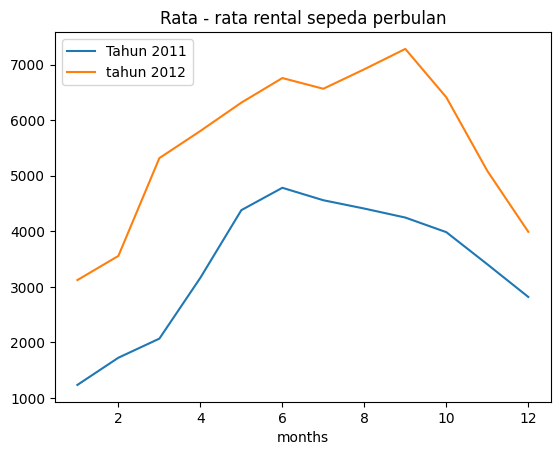

In [15]:
y11=data_days[data_days.yr==0].groupby(by="mnth").cnt.mean()
y12=data_days[data_days.yr==1].groupby(by="mnth").cnt.mean()

plt.plot(y11)
plt.plot(y12)

plt.legend(['Tahun 2011','tahun 2012'])
plt.title("Rata - rata rental sepeda perbulan")
plt.xlabel("months")
plt.show()


According the grap we saw at the same month and different years the rent a bicycle increased

Text(0, 0.5, '')

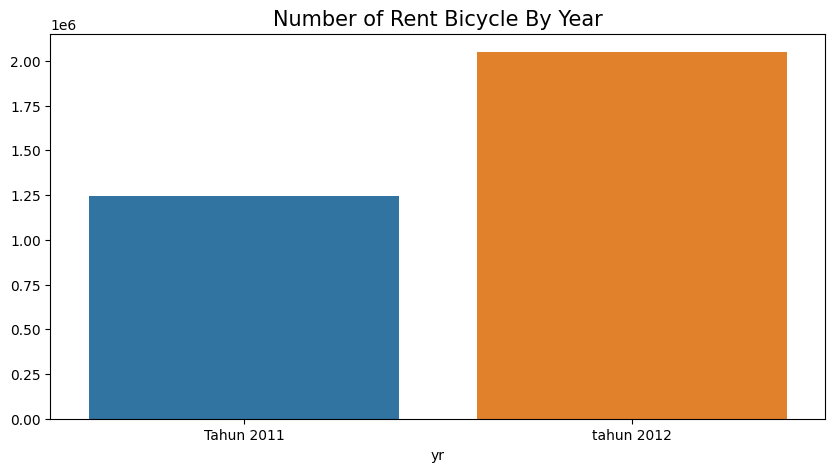

In [16]:
import seaborn as sns

tes=data_days.groupby('yr').cnt.sum().reset_index()
tes.yr.replace({0:'Tahun 2011',1:'tahun 2012'},inplace=True)


plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="cnt", 
    x="yr",
    data=tes,
)
plt.title("Number of Rent Bicycle By Year", loc="center", fontsize=15)
plt.ylabel(None)

Visualization above is diffence between years how much the bicycle get rent

Text(0, 0.5, 'Comparision of rent a bicycle by Season')

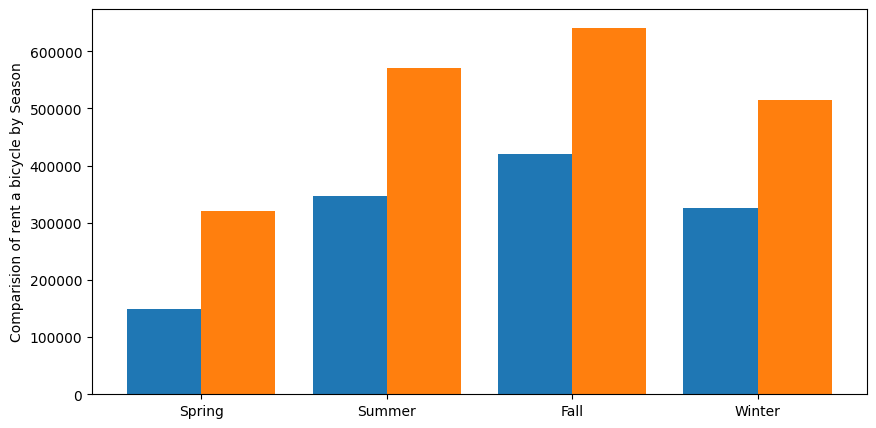

In [17]:
tahun11=data_days[data_days.yr==0].groupby(by="season").cnt.sum().reset_index()
tahun12=data_days[data_days.yr==1].groupby(by="season").cnt.sum().reset_index()

tahun11.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

# find range x
x=np.arange(len(tahun11))

figure=plt.figure(figsize=(10,5))

plt.bar(x-0.2,tahun11.cnt,0.4,label='Tahun 2011')
plt.bar(x+0.2,tahun12.cnt,0.4,label='Tahun 2012')

plt.xticks(x,tahun11.season)
plt.ylabel("Comparision of rent a bicycle by Season")


Dapat disimpulkan bahwa rental sepeda naik tiap tahun dan pada musim gugur mengalami peningkatan yang drastis sehingga memberikan masukkan kepada perusahan pengolah rental sepeda untuk meningkatkan jumlah rental sepeda lebih banyak pada musim gugur

Text(0.5, 1.0, 'Daily Orders')

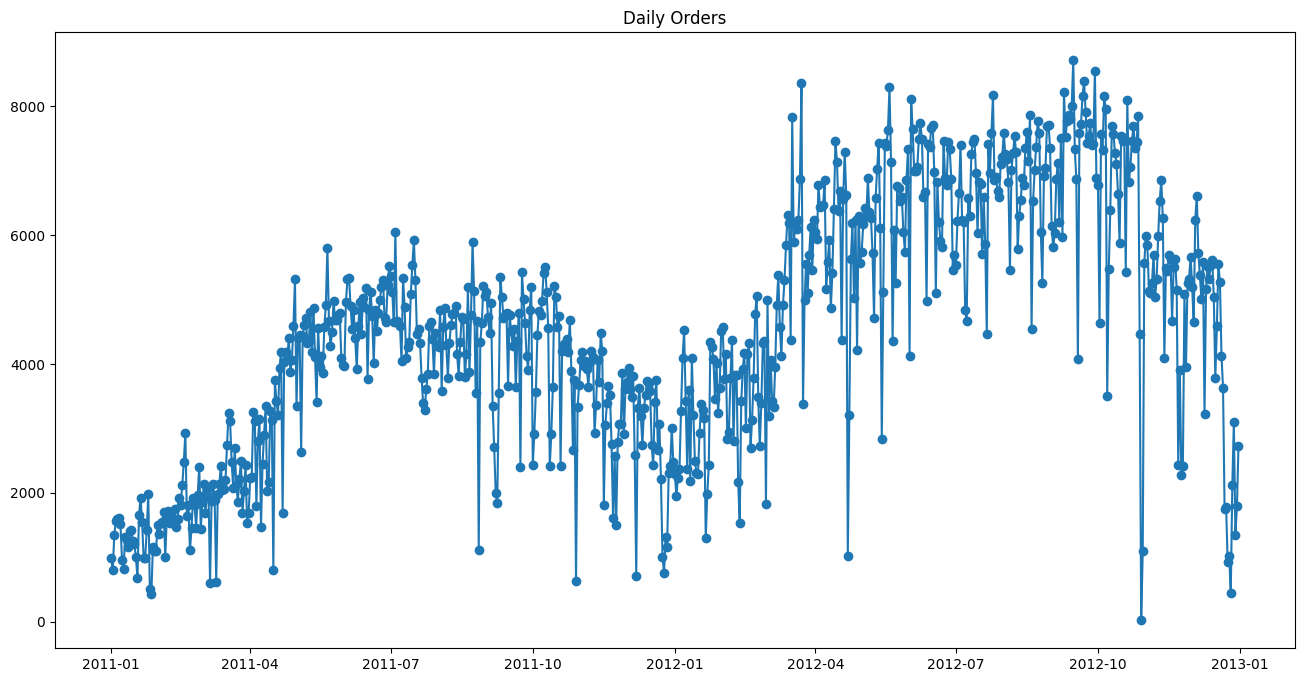

In [28]:
rent_bicycle_day=data_days.groupby(by="dteday").cnt.sum().reset_index()

fig,ax= plt.subplots(figsize=(16,8))

ax.plot(
    rent_bicycle_day.dteday,
    rent_bicycle_day.cnt,
    marker='o',
)

ax.set_title("Daily Orders")

In [30]:
import streamlit as st
st.subheader('Daily Orders')

2024-02-18 22:51:34.065 
  command:

    streamlit run c:\Users\boyhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [33]:
min_date = data_days.dteday.min()
max_date = data_days.dteday.max()
 
with st.sidebar:
    # Menambahkan logo perusahaan
    st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")
    
    # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label='Rentang Waktu',min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
    )